# Monte Carlo Simulation for FE
## IEOR 4703

### An example of the Hamiltonian trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
n = 5000
e = 0.10
l = 5
rho = 0.98

# Leapfrog Method

qArray = np.zeros((n+1,2))
pArray = np.zeros((n+1,2))

qArray[0] = np.array([-1.5, -1.5])
pArray[0] = np.array([-2, 1])

const = 1 - rho**2

for i in range(1, n + 1):

    q = qArray[i - 1]
    p = pArray[i - 1]

    for j in range(1,l+1):
        partials = np.array([q[0] - rho*q[1], q[1] - rho*q[0]])/const
        p = p - 0.5*e*partials
        #
        q = q + e*p
        #
        partials = np.array([q[0] - rho*q[1], q[1] - rho*q[0]])/const
        p = p - 0.5*e*partials

    qArray[i] = q
    pArray[i] = p

<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-4259974803.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Position Coordinates, $\epsilon=$' + str(e))
/tmp/ipython-input-4259974803.py:15: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Momentum Coordinates, $\epsilon=$' + str(e))


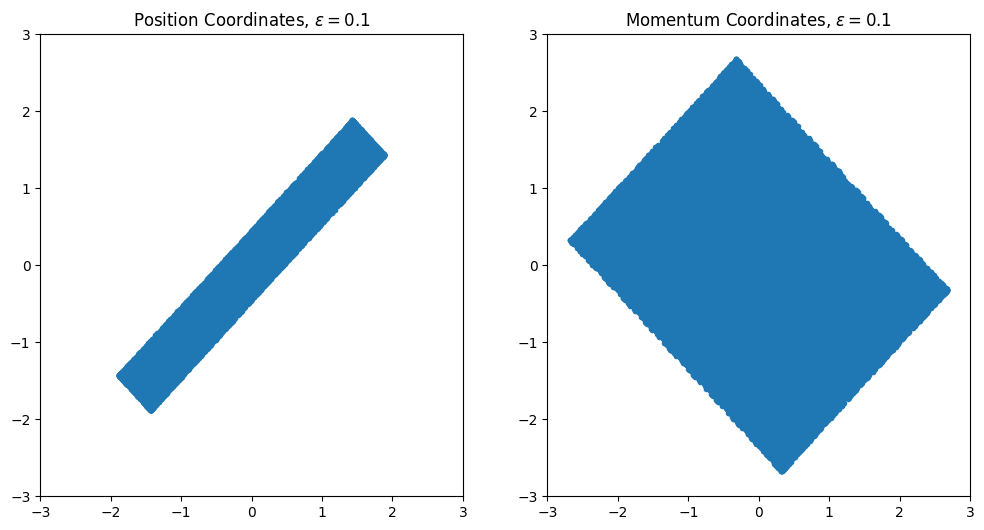

In [3]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)

x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x, y))
rv = multivariate_normal(np.array([0, 0]), np.array([[1.,rho],[rho,1.]]))
plt.contour(x, y, rv.pdf(pos), 4)
plt.plot(qArray[:,0], qArray[:,1], '.-')
plt.title('Position Coordinates, $\epsilon=$' + str(e))

plt.subplot(1,2,2)
rv2 = multivariate_normal(np.array([0, 0]), np.array([[1.,0.],[0.,1.]]))
plt.contour(x, y, rv2.pdf(pos), 4)
plt.plot(pArray[:,0], pArray[:,1], '.-')
plt.title('Momentum Coordinates, $\epsilon=$' + str(e))

plt.show()